C:\Users\maria\AppData\Local\Temp\ipykernel_1940\3101604183.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


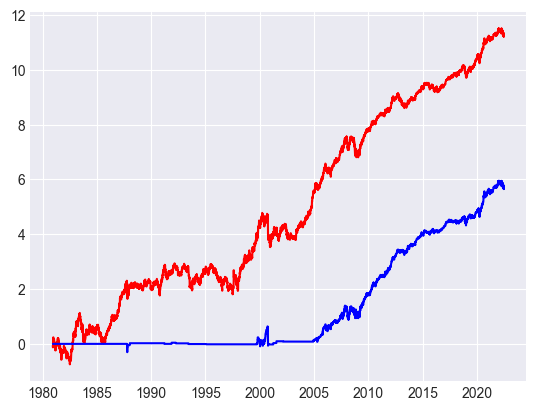

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# plt.style.use('seaborn-darkgrid')

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('apple-stock-price.csv')
df

# preprocessing
df.index = pd.to_datetime(df['Date'])       # changes the date column as index columns
df
  
df = df.drop(['Date'], axis='columns')      # drop The original date column
df

# explanatory variables
# predictor variables
df['Open-Close'] = df.Open - df.Close
df['High-Low'] = df.High - df.Low
  
# store all predictor variables in X
X = df[['Open-Close', 'High-Low']]
X.head()

# target variable
y = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)
y

# train/test split
split_percentage = 0.8
split = int(split_percentage*len(df))

X_train = X[:split]
y_train = y[:split]

X_test = X[split:]
y_test = y[split:]

# Support Vector Classifier (SVC)
cls = SVC().fit(X_train, y_train)

df['Predicted_Signal'] = cls.predict(X)

df['Return'] = df.Close.pct_change()        # daily returns

df['Strategy_Return'] = df.Return *df.Predicted_Signal.shift(1)     # strategy returns

df['Cum_Ret'] = df['Return'].cumsum()       # cumulative returns
df

df['Cum_Strategy'] = df['Strategy_Return'].cumsum()     # ctrategy cumulative returns
df


# plotting
import matplotlib.pyplot as plt
  
plt.plot(df['Cum_Ret'],color='red')
plt.plot(df['Cum_Strategy'],color='blue')